In [1]:
import numpy as np
import pandas as pd
#import root_pandas
#from root_pandas import read_root, to_root
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import math
import scipy
from scipy.optimize import curve_fit
from scipy import interpolate
import pickle
from six.moves import cPickle
import collections
import uproot

rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
matplotlib.rcParams.update({'font.size': 18})

In [2]:
def MakeHistogram_1D(sample, bins, weights = None, normed = False, density = None, range = None) :
  hist = np.histogram(sample, bins = bins, normed = normed, weights = weights, density = density, range = range)
  return hist[0]

In [3]:
n_bins = 50

tree = 'DecayTree'

In [4]:
vars_list = ['B_ptasy_1.50','log(B_LoKi_FDCHI2_BPV)','log(D0_LoKi_FDCHI2_BPV)','Bach_P','Bach_PT','D0_PT','log(Bach_IPCHI2_OWNPV)','log10(B_LoKi_MIPCHI2_PV)','log(D0_LoKi_MIPCHI2_PV)','B_LoKi_MAXDOCA','D0_LoKi_AMAXDOCA','log(1-B_LoKi_DIRA_BPV)','log(1-D0_LoKi_DIRA_BPV)','log10(B_LoKi_IP_BPV)','log10(D0_LoKi_IP_BPV)','log10(B_LoKi_RHO_BPV)','log10(B_LoKi_FD_BPV)','log10(D0_LoKi_RHO_BPV)','BDT','B_D0constPVconst_M','B_LoKi_LT_BPV']
columns = ['B_ptasy_1.50','log(B_LoKi_FDCHI2_BPV)','log(D0_LoKi_FDCHI2_BPV)','Bach_P','Bach_PT','D0_PT','log(Bach_IPCHI2_OWNPV)','log10(B_LoKi_MIPCHI2_PV)','log(D0_LoKi_MIPCHI2_PV)','B_LoKi_MAXDOCA','D0_LoKi_AMAXDOCA','log(1-B_LoKi_DIRA_BPV)','log(1-D0_LoKi_DIRA_BPV)','log10(B_LoKi_IP_BPV)','log10(D0_LoKi_IP_BPV)','log10(B_LoKi_RHO_BPV)','log10(B_LoKi_FD_BPV)','log10(D0_LoKi_RHO_BPV)','BDT','B_D0constPVconst_M','B_LoKi_LT_BPV']


vars_list_ratio = ['B_LoKi_LT_BPV']

var_MC = vars_list.copy()
var_MC.append('Bach_PIDK_corr')

var_data = vars_list.copy()
var_data.append('Bach_PIDK')

ranges = {'B_LoKi_LT_BPV':[0,0.007]}
label = {'B_LoKi_LT_BPV' : "$B_{LT}$"}

In [5]:
Bmc_file = uproot.open('/data/lhcb/users/abrantes/Bc2DX_crosscheck/BDT_efficiency/Reweight/full_dataset/tuples/MC/Total_Bu2DPi_Cuts_PIDCorr_xgboostBDT_masscuts_fulldataset.root', branches=var_MC)
Bcmc_file = uproot.open('/data/lhcb/users/abrantes/Bc2DX_crosscheck/BDT_efficiency/Reweight/full_dataset/tuples/MC/Total_Bc2DPi_Cuts_PIDCorr_xgboostBDT_masscuts_fulldataset.root', branches=var_MC)

Bmc_tree = Bmc_file['DecayTree']
Bcmc_tree = Bcmc_file['DecayTree']


df_Bmc = Bmc_tree.arrays(var_MC, 'Bach_PIDK_corr<1 & (B_D0constPVconst_M>5150) & (B_D0constPVconst_M<5400) ',library="pd")
df_Bcmc = Bcmc_tree.arrays(var_MC,'Bach_PIDK_corr<1 & (B_D0constPVconst_M>6150) & (B_D0constPVconst_M<6400)',library="pd")

# apply cuts
#Bmass_window = (5150,5400)
#Bcmass_window = (6150,6400)

#df_Bmc = df_Bmc.loc[(df_Bmc['B_D0constPVconst_M'] >= Bmass_window[0]) & (df_Bmc['B_D0constPVconst_M'] <= Bmass_window[1])]
#df_Bcmc = df_Bcmc.loc[(df_Bcmc['B_D0constPVconst_M'] >= Bcmass_window[0]) & (df_Bcmc['B_D0constPVconst_M'] <= Bcmass_window[1])]

df_Bmc.dropna(inplace=True)
df_Bcmc.dropna(inplace=True)

label = {'B_LoKi_LT_BPV' : 'B LT'}

/cvmfs/lhcb.cern.ch/lib/var/lib/LbEnv/2361/stable/linux-64/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/cvmfs/lhcb.cern.ch/lib/var/lib/LbEnv/2361/stable/linux-64/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


plotting Bu MC vs Bc MC variables used in the ratio


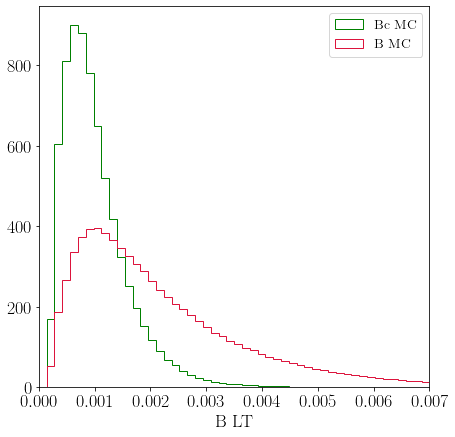

In [6]:
print('plotting Bu MC vs Bc MC variables used in the ratio')

for v in vars_list_ratio:

    df_Bmc = df_Bmc[df_Bmc[v].between(df_Bmc[v].min(),df_Bmc[v].max())]

    fig, ax = plt.subplots(figsize=(7,7))

    #plt.errorbar(bin_centres, counts, yerr=err, fmt='o')
    plt.hist(df_Bcmc[v],bins=n_bins,histtype='step',color='green',label='Bc MC',range=ranges[v],density=True)
    plt.hist(df_Bmc[v],bins=n_bins,histtype='step',color='crimson',label='B MC',range=ranges[v],density=True)

    
    plt.xlabel(label[v])
    plt.xlim(ranges[v])
    plt.legend(fontsize=14)
    plt.show()
    plt.savefig('figs/compare_plots/%s.pdf' % v)
    plt.close()

In [7]:
df_Bmc['MC_weights'] = 1

tck_dict = {}

Starting variable: B_LoKi_LT_BPV


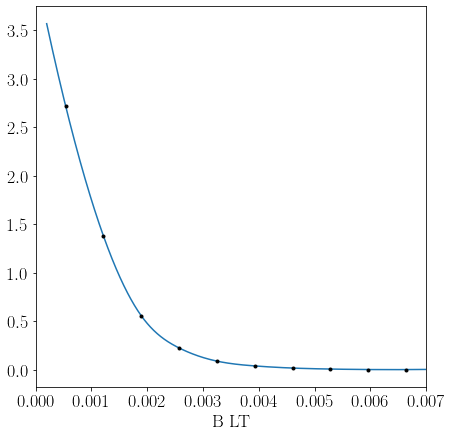

0         0.161611
1         0.717407
2         1.185531
3         0.193767
4         0.372822
            ...   
408507    0.895998
408508    0.084117
408509    0.577369
408510    1.322894
408512    0.029108
Name: MC_weights, Length: 373891, dtype: float64


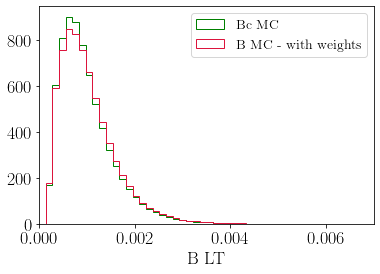

In [8]:
# ratio histograms

ratio_bins = 10

for v in vars_list_ratio:

    print("Starting variable: %s" %v)

    df_Bmc = df_Bmc[df_Bmc[v].between(ranges[v][0],ranges[v][1])]
    df_Bcmc = df_Bcmc[df_Bcmc[v].between(ranges[v][0],ranges[v][1])]

    Bmc_size = df_Bmc.count()[0]
    Bcmc_size = df_Bcmc.count()[0]

    # create ratio hists and apply weights
    binning = np.linspace(df_Bcmc[v].min(),df_Bcmc[v].max(),ratio_bins+1)

    Bcmc_vals, Bcmc_edges = np.histogram(df_Bcmc[v],bins=binning,density=True)
    Bmc_vals, Bmc_edges = np.histogram(df_Bmc[v],bins=binning,density=True,weights=df_Bmc['MC_weights'])

    ratio = Bcmc_vals/Bmc_vals

    Bmc_counts = Bmc_vals*Bmc_size
    Bcmc_counts = Bcmc_vals*Bcmc_size
    err = ratio * np.sqrt(1/abs(Bmc_counts) + 1/abs(Bcmc_counts))

    centres = (Bcmc_edges[:-1] + Bcmc_edges[1:])/2.

    # calculate spline
    tck = interpolate.splrep(centres, ratio, k=3, w=1.0/err)
    spline_x = np.linspace(df_Bmc[v].min(),df_Bmc[v].max(),1000)
    spline_val = interpolate.splev(spline_x, tck, der=0)

    fig, ax = plt.subplots(figsize=(7,7))
    plt.errorbar(centres,ratio,yerr=err,fmt='ko',markersize=3)
    plt.plot(spline_x,spline_val)
    plt.xlabel(label[v])
    plt.xlim(ranges[v])
    plt.show()
    plt.savefig('figs/ratios/%s_ratio.pdf' %v)
    plt.close()
    
    # calculate weight for each MC event and save
    Bmc_weights = interpolate.splev(df_Bmc[v].to_numpy(), tck)

    # Update weights
    df_Bmc['MC_weights'] = df_Bmc['MC_weights']*Bmc_weights

    print(df_Bmc['MC_weights'])
    
    # Plot MCs with weigth
    plt.hist(df_Bcmc[v],bins=n_bins,histtype='step',color='green',label='Bc MC',range=ranges[v],density=True)
    plt.hist(df_Bmc[v],bins=n_bins,histtype='step',color='crimson',label='B MC - with weights',range=ranges[v],density=True,weights=df_Bmc['MC_weights'])

    #plt.show()
    plt.xlabel(label[v])
    plt.xlim(ranges[v])
    plt.legend(fontsize=14)
    plt.show()
    plt.savefig('figs/compare_plots/%s_weight.pdf' % v)
    plt.close()
    
    f = open('figs/weights/MC_with_weights.pkl', 'wb')
    cPickle.dump(df_Bmc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    #Store the polynomial order and the list of param values
    tck_dict[v] = tck
    f = open('figs/splines/%s_tck_corrs.pkl' % v, 'wb')
    cPickle.dump(tck_dict[v], f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

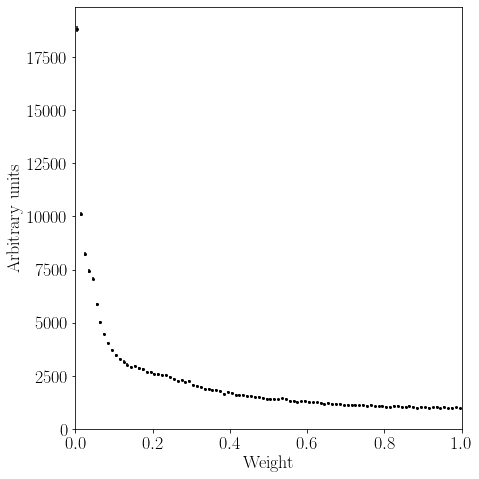

In [9]:
# make histogram of final weights

weight_vals,weight_edges = np.histogram(df_Bmc['MC_weights'],bins=100,range=[0,1])
weight_centres = (weight_edges[:-1] + weight_edges[1:])/2.
Bmc_size = df_Bmc.count()[0]
#weight_err = np.sqrt(weight_vals/MC_size)
weight_err = np.sqrt(weight_vals)

fig, ax = plt.subplots(figsize=(7,7))
plt.errorbar(weight_centres,weight_vals,yerr=weight_err,fmt='ko',markersize=2,label='Weight')
plt.xlabel('Weight')
plt.ylabel('Arbitrary units')
plt.xlim(0,1)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()
plt.savefig('figs/weights/final_weights.pdf')
plt.close()

In [10]:
# save Bu MC with weights
mc_out = uproot.recreate("tuples/MC/Total_Bu2DPi_Cuts_PIDCorr_xgboostBDT_masscuts_fulldataset_LTreweighted.root")
mc_out["DecayTree"] = df_Bmc

In [11]:
# apply weight to Bu2DPi data
Bdata_file = uproot.open('/data/lhcb/users/abrantes/Bc2DX_crosscheck/BDT_efficiency/Reweight/full_dataset/tuples/data/Total_Bu2DPi_Cuts_xgboostBDT_masscuts_fulldataset.root', branches=var_data)

Bdata_tree = Bdata_file['DecayTree']

df_Bdata = Bdata_tree.arrays(var_data, 'Bach_PIDK<1 & (B_D0constPVconst_M>5150) & (B_D0constPVconst_M<5400)',library="pd")

df_Bdata['weights'] = 1
df_toweight = df_Bdata.copy()

df_Bdata['inrange'] = 1

/cvmfs/lhcb.cern.ch/lib/var/lib/LbEnv/2361/stable/linux-64/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


In [12]:
for v in vars_list_ratio:
    print("Starting variable: %s" %v)

    df_toweight = df_toweight[(df_toweight[v] >= ranges[v][0]) & (df_toweight[v] <= ranges[v][1])]

    #check if event falls outside the range
    df_Bdata.loc[(df_Bdata[v]<ranges[v][0]) | (df_Bdata[v]>ranges[v][1]),"inrange"] = 0

    f = open('figs/splines/%s_tck_corrs.pkl' % v, 'rb')
    tck = cPickle.load(f)
    f.close()

    df_toweight["tck_vals_{}".format(v)] = interpolate.splev(df_toweight[v], tck, der=0)
    df_toweight['weights'] = df_toweight['weights'] * df_toweight["tck_vals_{}".format(v)]
    print(df_toweight['weights'])

print('# Events before:',df_Bdata.count()[0])
print('# Events after:',df_toweight.count()[0])
print('Check ranges:',np.sum(df_Bdata['inrange']))
print('---------------------')
print('Max weight:',df_toweight['weights'].max())
print('Min weight:',df_toweight['weights'].min())

Starting variable: B_LoKi_LT_BPV
1           0.602421
2           2.794355
3           0.149751
6           0.972711
7           1.562496
              ...   
23708890    0.086199
23708891    0.261152
23708892    0.642522
23708893    0.999148
23708894    0.789330
Name: weights, Length: 19240878, dtype: float64
# Events before: 19437086
# Events after: 19240878
Check ranges: 19240878
---------------------
Max weight: 4.1086684718529005
Min weight: 0.0008481492539657404


In [13]:
#append weights to dataframe, assign weight of 1 to events outside range
df_Bdata['weights'] = df_toweight['weights']
df_Bdata['weights'] = df_Bdata['weights'].fillna(1)

In [14]:
# Output dataframe with weights
#import awkward as ak
data_out = uproot.recreate("tuples/data/Total_Bu2DPi_Cuts_xgboostBDT_masscuts_fulldataset_LTreweighted.root")
data_out["DecayTree"] = df_Bdata

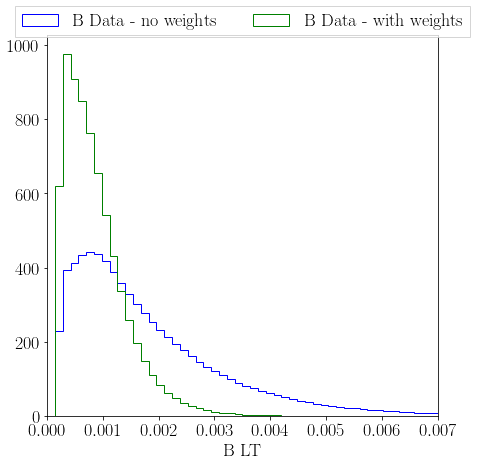

In [15]:
for v in vars_list_ratio:
    fig, ax = plt.subplots(figsize=(7,7))
    #plt.hist(df_Bcmc[v],bins=n_bins,histtype='step',color='red',label='Bc MC',range=ranges[v],density=True)
    plt.hist(df_Bdata[v],histtype='step',bins=n_bins,color='blue',label='B Data - no weights',range=ranges[v],density=True)
    plt.hist(df_Bdata[v],histtype='step',bins=n_bins,color='green',label='B Data - with weights',range=ranges[v],density=True,weights=df_Bdata['weights'])
    plt.xlabel(label[v])
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=False, shadow=False,ncol=2)
    plt.xlim(ranges[v])
    plt.ylim(bottom=0)
    plt.show()
    plt.savefig('figs/reweighted_plots/%s.pdf' %v)
    plt.close()